In [1]:
from utils_copy import *

from IPython.display import Image

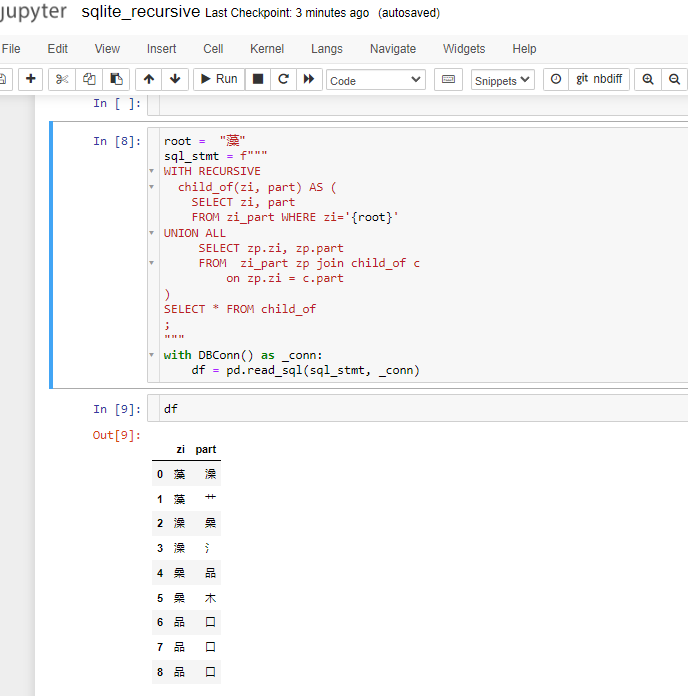

In [2]:
Image(filename='zi_part_ok.png') 

table `zi_part` has index on zi

In [13]:
root =  "能"# "㝱"# "藻" # "㕡"  # 
sql_stmt = f"""
WITH RECURSIVE
  zi_part_v(zi, part) as (

    select zi,part from (
        select zi, zi_left_up as part from t_zi_part where zi_left_up is not null
         union all 
        select zi, zi_left as part from t_zi_part where  zi_left is not null
         union all 
        select zi, zi_left_down as part from t_zi_part where  zi_left_down is not null
         union all 
        select zi, zi_up as part from t_zi_part where  zi_up is not null
         union all 
        select zi, zi_mid as part from t_zi_part where   zi_mid is not null
         union all 
        select zi, zi_down as part from t_zi_part where  zi_down is not null
         union all 
        select zi, zi_right_up as part from t_zi_part where  zi_right_up is not null
         union all 
        select zi, zi_right as part from t_zi_part where  zi_right is not null
         union all 
        select zi, zi_right_down as part from t_zi_part where  zi_right_down is not null
         union all 
        select zi, zi_mid_out as part from t_zi_part where  zi_mid_out is not null
         union all 
        select zi, zi_mid_in as part from t_zi_part where  zi_mid_in is not null
    ) 
    where zi is not null and part is not null and zi != '' and part != '' 
    --order by zi,part
),
  child_of(zi, part) AS (
        SELECT zi, part 
        FROM zi_part_v WHERE zi='{root}'
    --UNION   -- no duplicates
    UNION ALL
         SELECT zp.zi, zp.part  
         FROM  zi_part_v zp join child_of c
             on zp.zi = c.part
)
SELECT * FROM child_of
;
"""
with DBConn() as _conn:
    df = pd.read_sql(sql_stmt, _conn)

df 

,zi,part
0,能,厶
1,能,月
2,能,匕
3,能,匕
